# Analysis of 2023 US Gymnastics Championship

In [1]:
from gym.gym import *
from gym.plot import *

#### Data Structure

In women's gymnastics, there are 4 events: vault, uneven bars, balance beam, and floor exercise. For each athlete, in addition to these four event scores, they have an All Around score, which is simply the sum of their four event scores. This data analysis will look at rankings of scores from the 2023 US National Championships, which had two days of competition. While average (overall) standings were the deciding factor for rankings, looking at each day's scores in combination with the average score paints a more complete picture of athlete performance.

In [2]:
AA = import_data()
print(AA.columns)
print(AA.head())

Index(['Name', 'Vault_day1', 'Bars_day1', 'Beam_day1', 'Floor_day1', 'AA_day1',
       'Color', 'Vault_day2', 'Bars_day2', 'Beam_day2', 'Floor_day2',
       'AA_day2', 'AA_avg', 'Vault_avg', 'Bars_avg', 'Beam_avg', 'Floor_avg'],
      dtype='object')
            Name  Vault_day1  Bars_day1  Beam_day1  Floor_day1  AA_day1  \
0   Simone Biles       15.70      14.35      14.45       14.80    59.30   
1  Shilese Jones       14.35      14.90      13.45       14.05    56.75   
2    Leanne Wong       14.25      14.00      13.75       13.35    55.35   
3   Skye Blakely       14.35      14.40      14.05       12.90    55.70   
4  Jordan Chiles       14.30      14.20      13.00       13.10    54.60   

          Color  Vault_day2  Bars_day2  Beam_day2  Floor_day2  AA_day2  \
0  mediumorchid       14.85      14.05      14.85       15.40    59.15   
1     lightpink       14.40      15.00      14.30       14.10    57.80   
2          blue       14.05      14.00      13.70       14.00    55.75   
3 

#### Data Encoding

The following legend displays unique colors for each of the 28 athletes that competed, which will be universal for following visualizations. See README for customization of these colors.

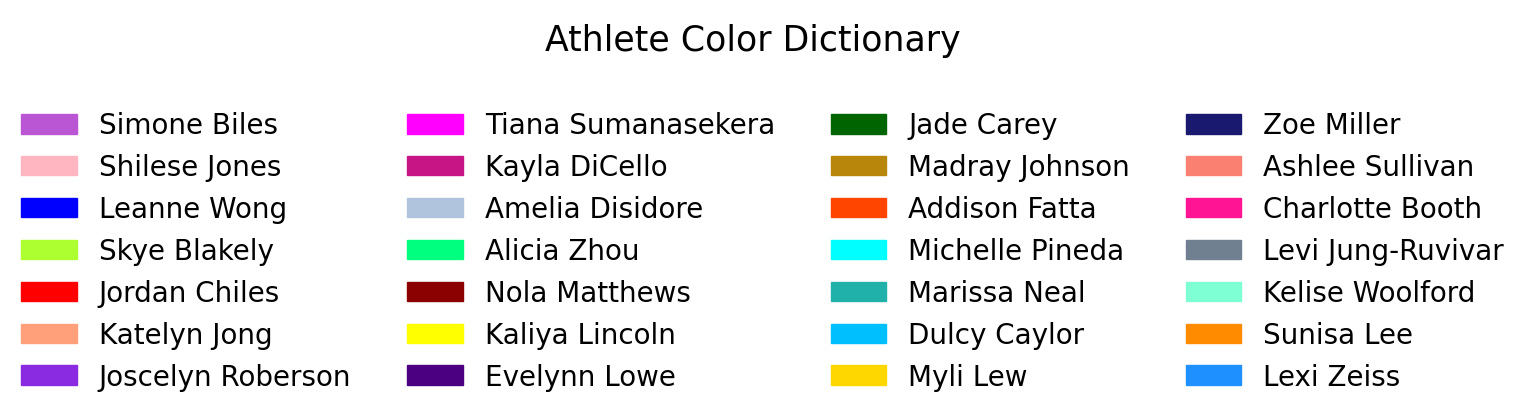

In [3]:
athlete_legend(AA['Color'], AA['Name'])

## All-Around Analysis

The All-Around (AA) standings were critical in this competition, as only the 10 top scoring All-Arounders were automatically named to the national team. If an elite gymnast's goal is to be selected for international assignments, being on the national team is a precursor for consideration.

### Top Average AA Performance

This plot shows the top 10 aforementioned All-Arounders with slopes between their Day 1 and Day 2 scores to highlight trends in performance. Ideally, an athlete would want to show consistency by performing similarly across the two days of competition, yielding a zero or shallow slope. 

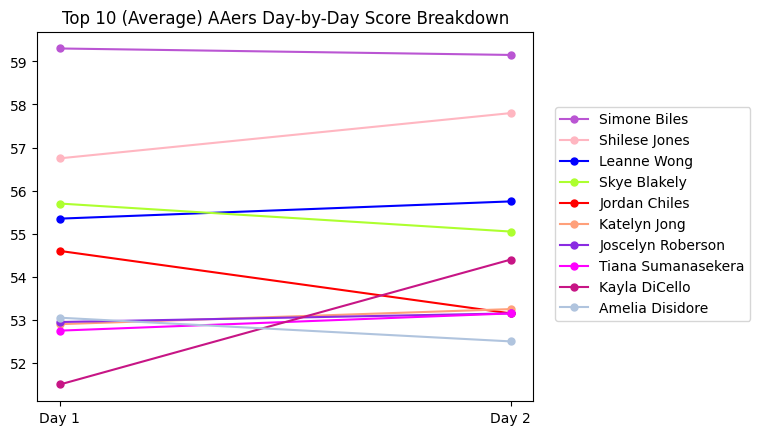

In [4]:
AA_slope_plot(AA['Name'], AA["Color"], AA['AA_day1'], AA['AA_day2'], 10)

Looking at the same group of top 10 average AAers, this plot shows the score broken down by event. This highlights differences among athlete's strengths. For example, comparing Tiana Sumanasekera and Kayla Dicello (since they have the same overall score), we can see that Kayla performed stronger on bars and floor, while Tiana performed stronger on beam. These differences will become important to consider later when building a standard team of 5 athletes. 

The bar labels show the high score for the first bar and distance from the high score for subsequent bars, as is consistent with the sport's typical format.

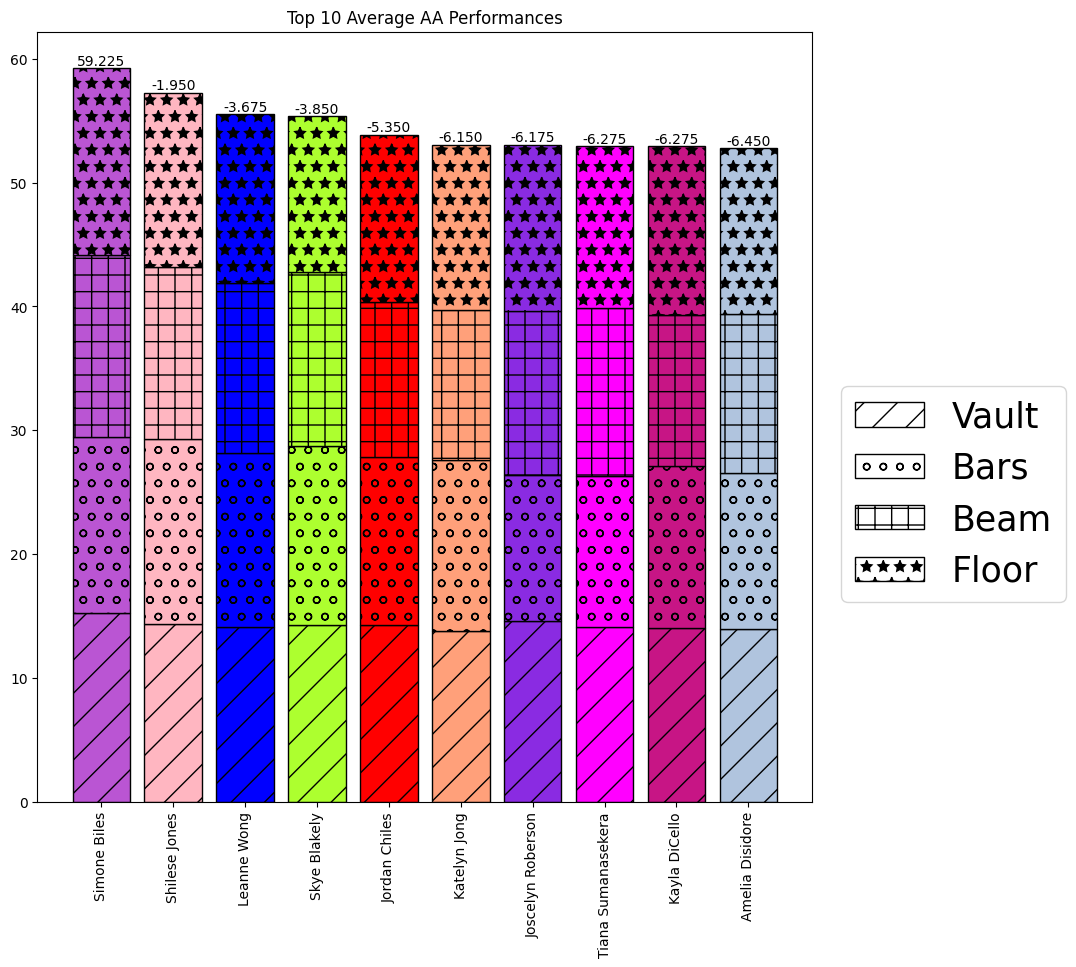

In [5]:
AA_avg_bar_chart(AA)

### Day-by-Day: Top 10 AA Performances

Looking at both Day 1 and Day 2 scores helps to look at athlete consistency and to highlight athletes that may have had a significantly better performance on one day. While ideally a gymnast would want to show consistency and post similar scores each day, some athletes don't appear in the average All Around standings due to unexpected missed routines on one or both days (e.g. Olympic Gold Medalist Jade Carey only shown on Day 2).

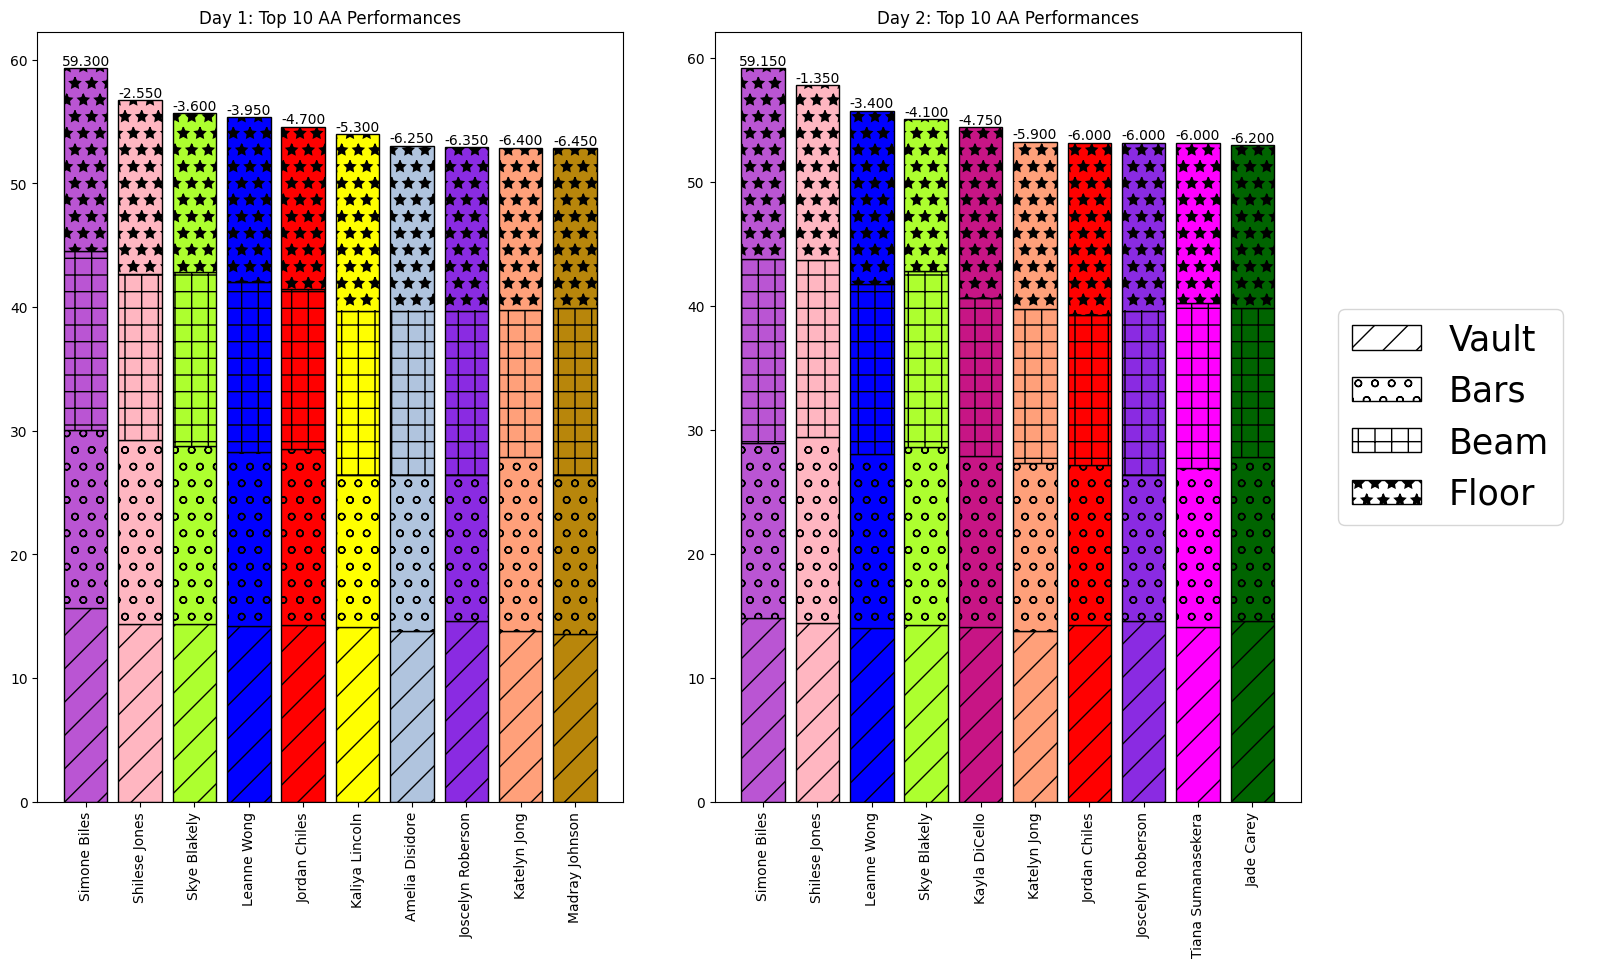

In [6]:
AA_by_day_bar_chart(AA)

## Event-by-Event Analysis

Looking at event scores is crucial when we begin to think about the context of building a team. Teams consist of 5 members total, and in a final round of competition, 3 team members perform each event which all count towards the team total. When selecting athletes for each event, you not only want to look for the highest scores possible, but also the consistency/reliability of those scores.

### Day-by-Day: Top 10 (First) Vault Performances

*NOTE:* Some athletes performed two vaults, so the (first) is to specify that these are their first vault scores, which are the ones that counted towards their All-Around scores. This distinction is not siginificant for the purposes of this analysis, but is included as a note for anyone very familiar with the sport.

Looking at top scores for both days gives a clear picture of which athletes have high scoring potential when they "hit" (perform routine as intended, e.g. no falls).

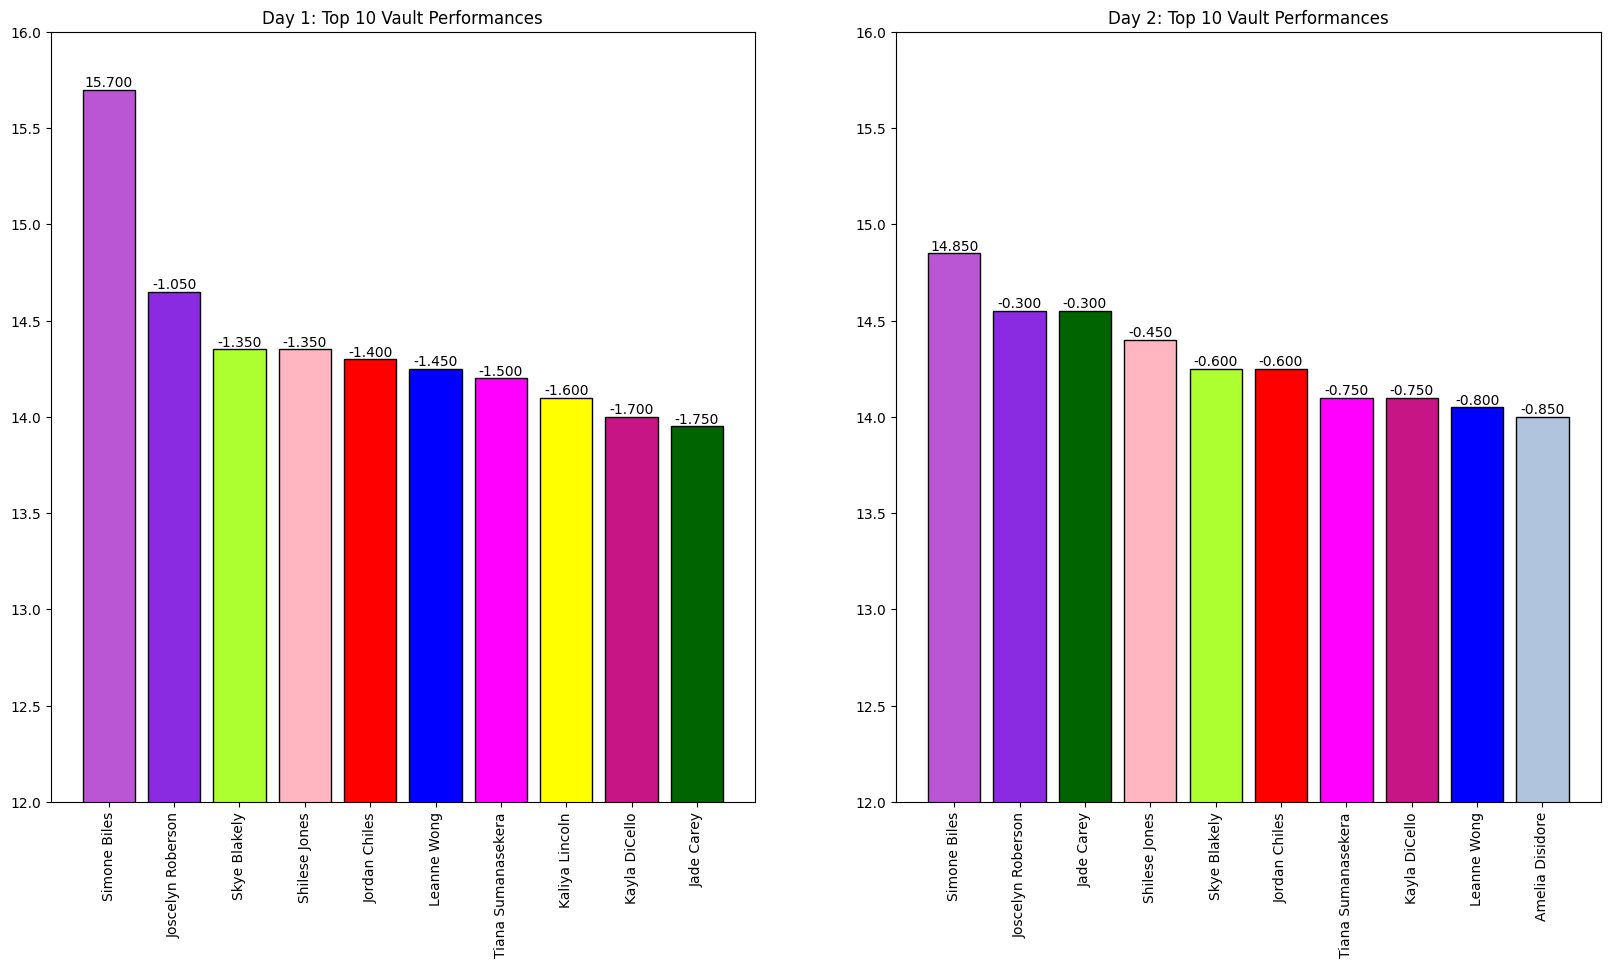

In [7]:
event_by_day_bar_chart(AA, 'Vault')

### Top Average Vault Performances (with Minimum & Maximum Score)

Looking at the average top scores weeds out some athletes who may have high scoring potential, but also have low scoring potential if they don't hit a routine. Additionally, the error bars display the range of scores across the days, giving a visual estimate of how reliable this athlete's score is. A large error bar indicates a reason for caution in relying on that score.

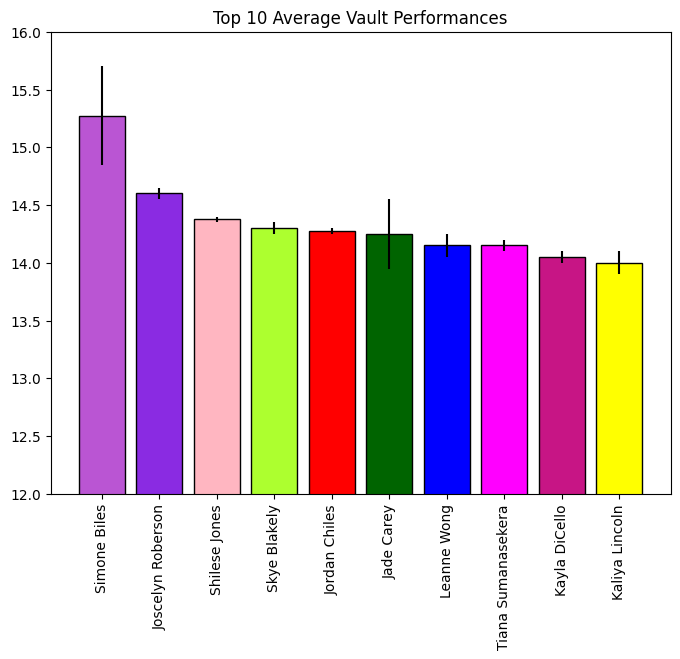

In [8]:
event_avg_bar_chart(AA, 'Vault')

### Day-by-Day: Top 10 Bars Performances

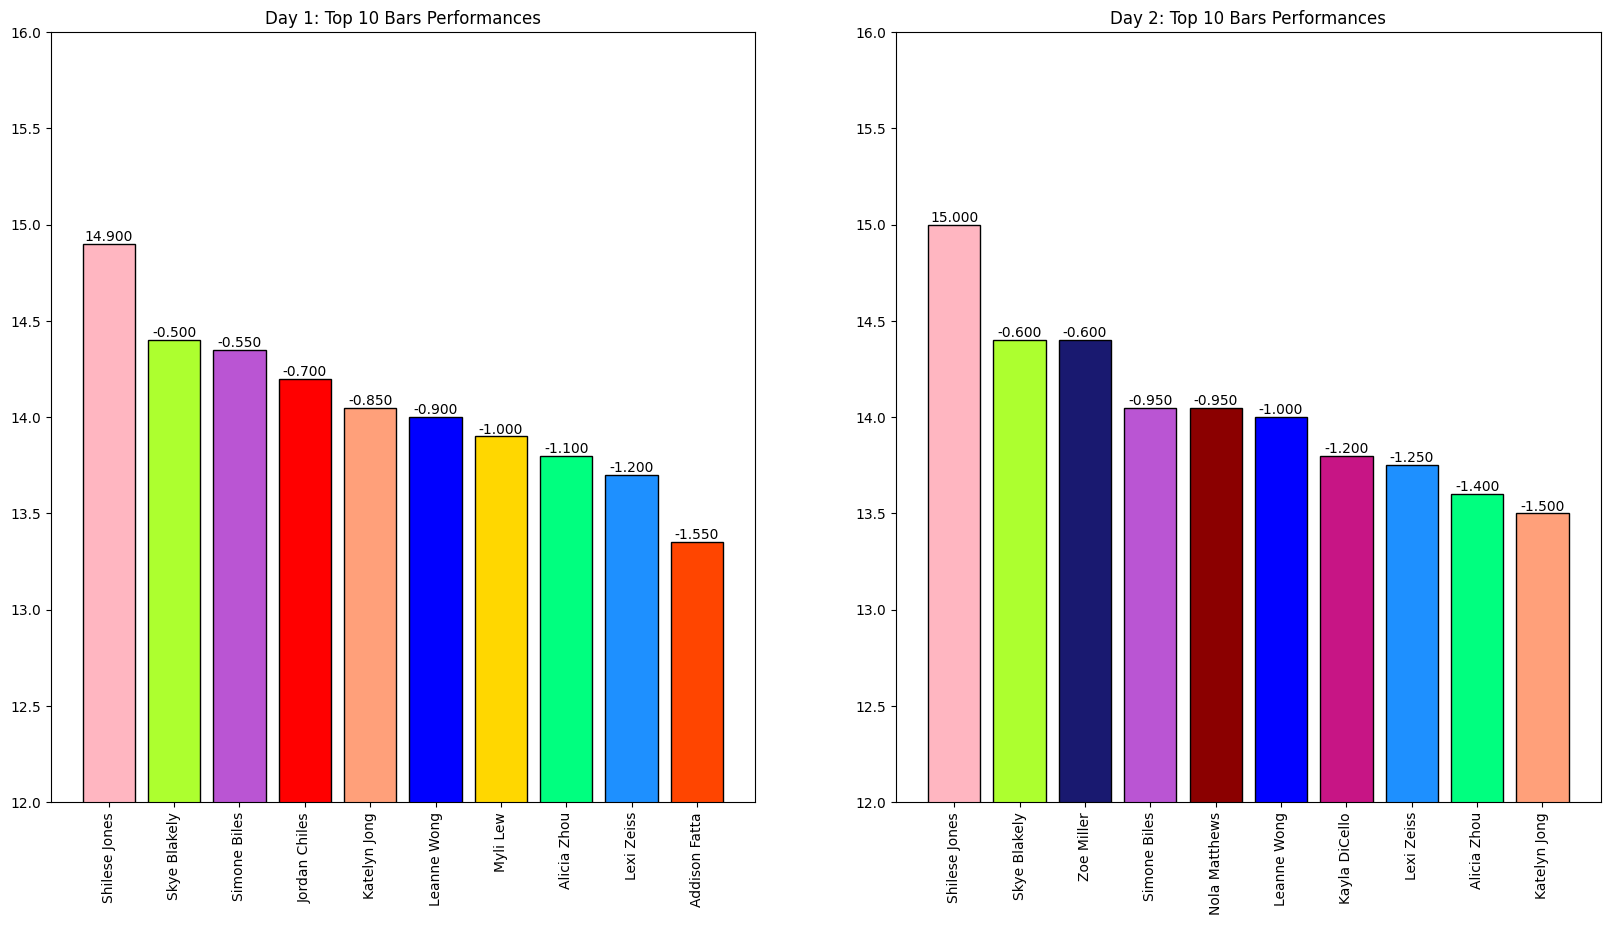

In [9]:
event_by_day_bar_chart(AA, 'Bars')

### Top Average Bars Performances (with Minimum & Maximum Score)

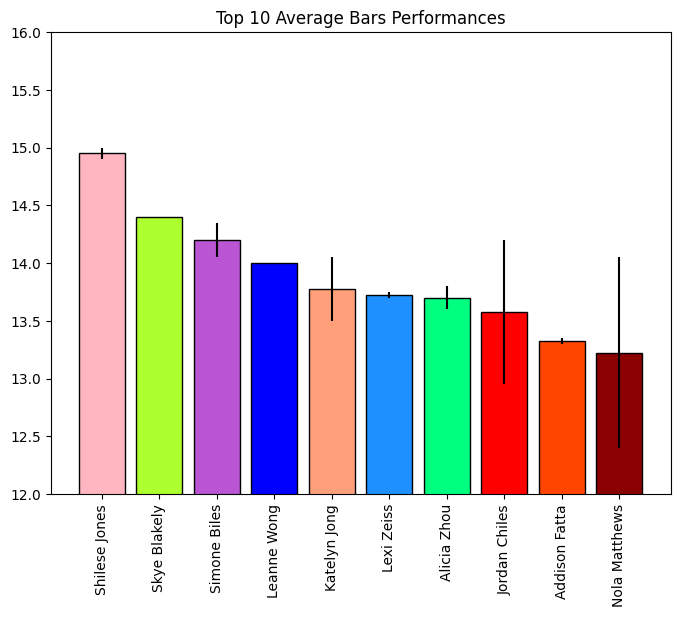

In [10]:
event_avg_bar_chart(AA, 'Bars')

### Day-by-Day: Top 10 Beam Performances

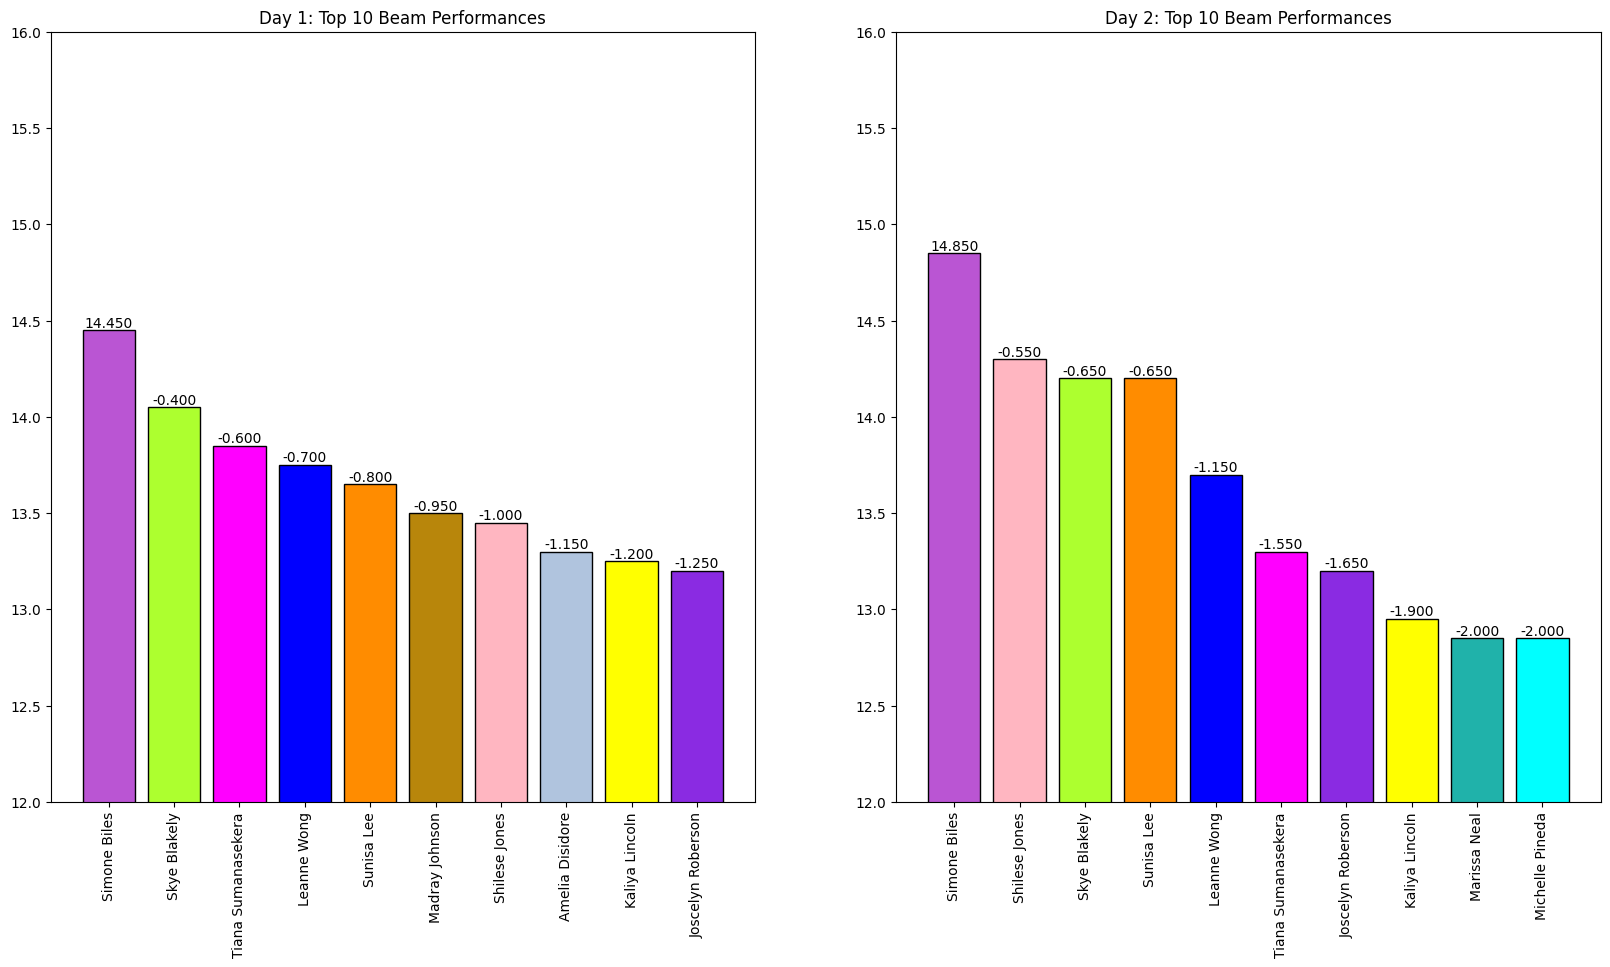

In [11]:
event_by_day_bar_chart(AA, 'Beam')

### Top Average Beam Performances (with Minimum & Maximum Score)

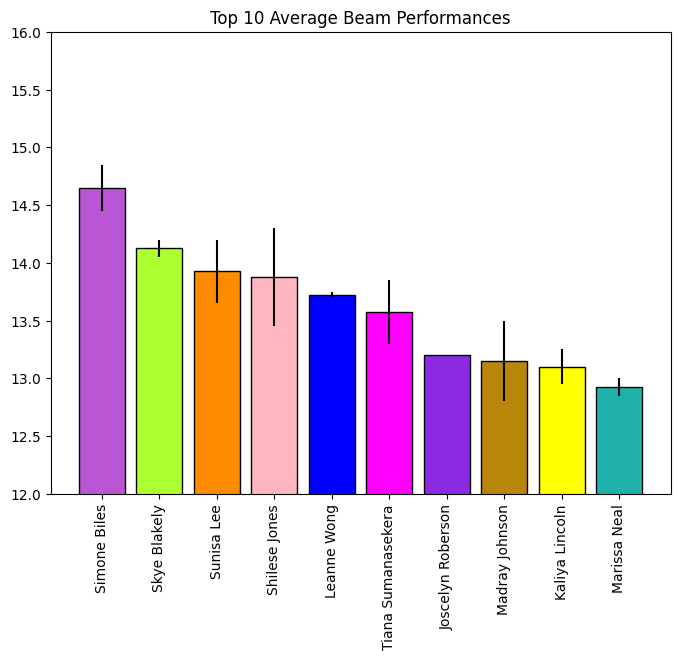

In [12]:
event_avg_bar_chart(AA, 'Beam')

### Day-by-Day: Top 10 Floor Performances

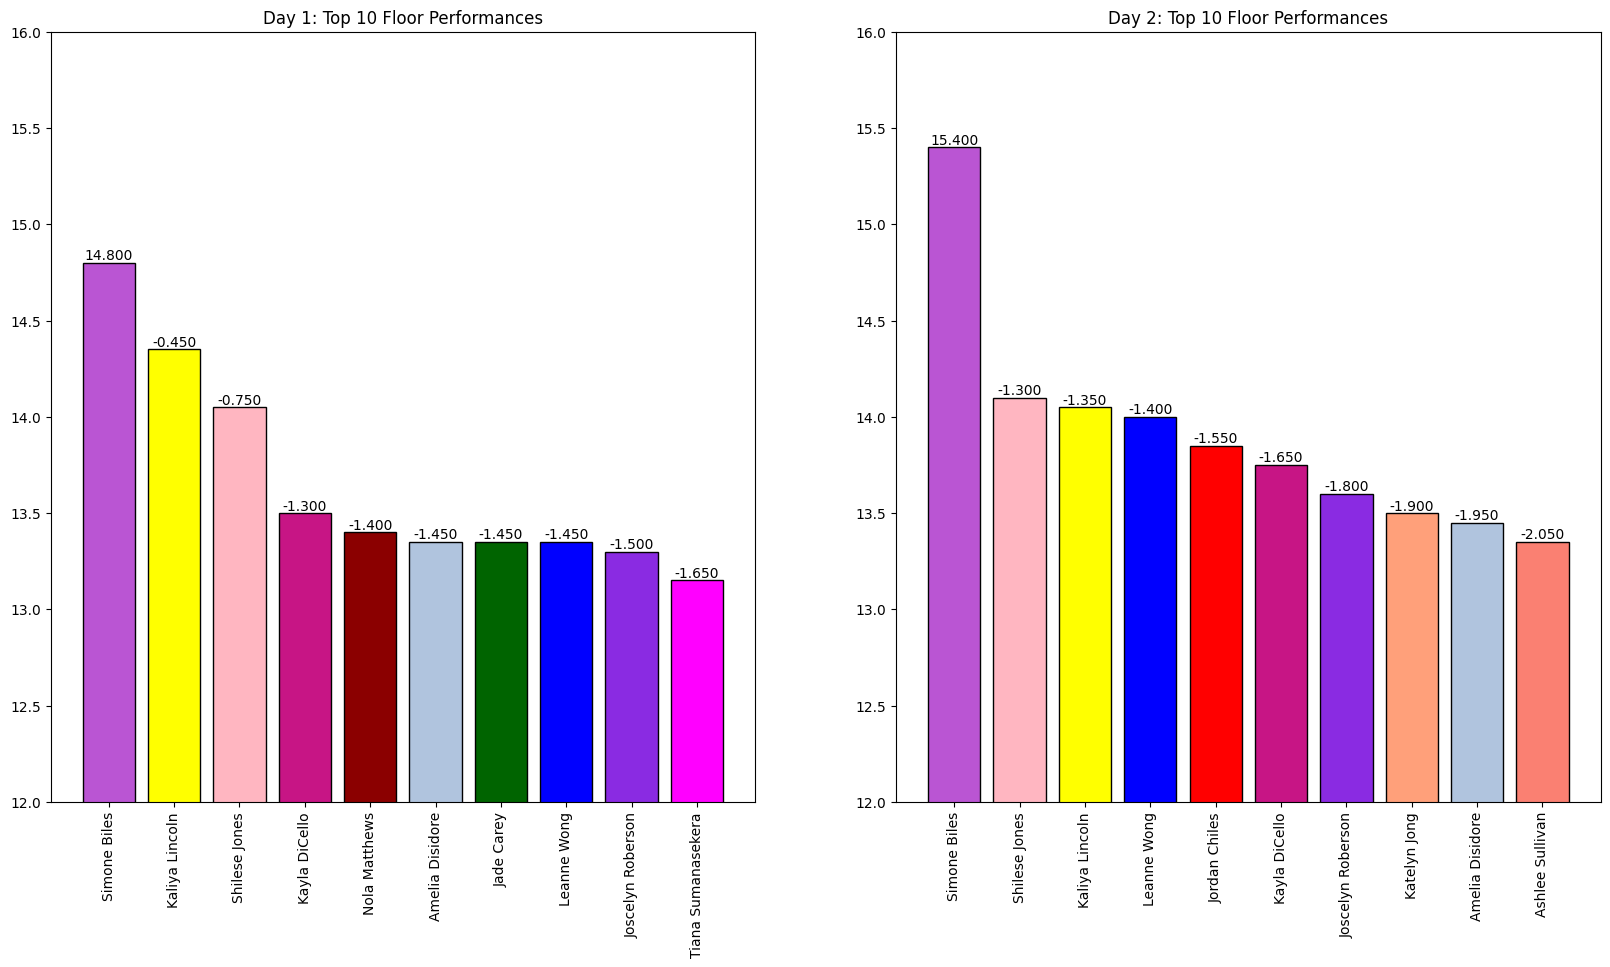

In [13]:
event_by_day_bar_chart(AA, 'Floor')

### Top Average Floor Performances (with Minimum & Maximum Score)

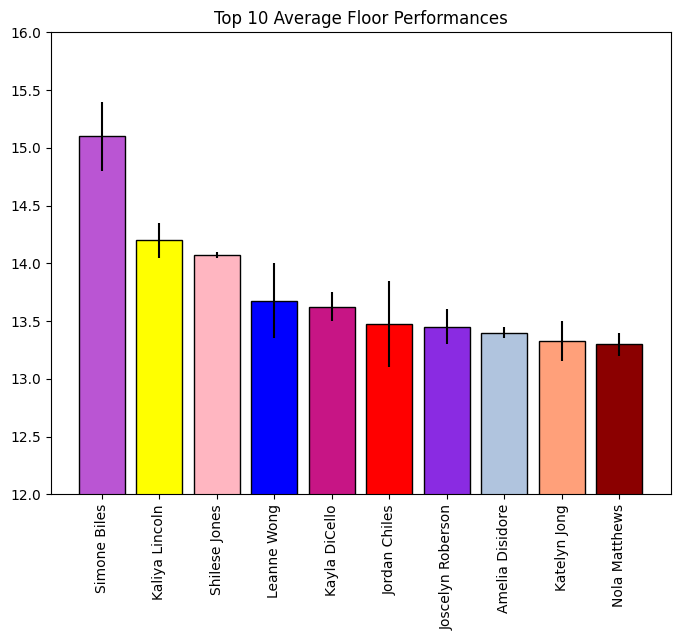

In [14]:
event_avg_bar_chart(AA, 'Floor')

## Calculating the Highest Scoring Team(s)

While the purpose of this analysis thus far has mostly been to visualize differences in individual athlete scores, this section changes the scope to building a team. A team is composed of 5 members, 3 of which can compete on each event. These scores are all totaled to make the team score. Due to the limited permutations, the 5 team members need to have strengths that compliment eachother such that the team score is optimized.

The algorithm runs through each combination of 5 athletes to construct all possible teams. For each event, the top 3 scoring routines are documented along with the corresponding athletes. The total team scores are also computed. This is fairly computationally expensive due to the number of combinations (run time ~30 mins), so results are saved to Excel and imported as needed.

In [15]:
# This line only needs to be run if the competition data is changed (color excluded)
#run_team_combinations(AA)

### Day 1: Top Scoring Teams

This stacked bar chart shows the highest scoring teams (among all possible iterations). This makes it easy to visualize which athletes are in the mix for the highest scoring teams as well as the impact different athlete/event swaps would make on team scoring potential.

The bar chart is followed by a table which maps the Team IDs shown on the chart X-axis to its team members.

Since only the 3 highest scores for each event are counted, many teams with a different combination of 5 athletes end up with the same 12 counting scores. To find these duplicate teams, the strings (names and events) were converted to ints to quickly compare matrices with event, name, score ranking (1-3), and score. The equivalent Team ID's are stored to be noted in the team member table. Flags denote athletes which could be swapped with no impact to the team score.

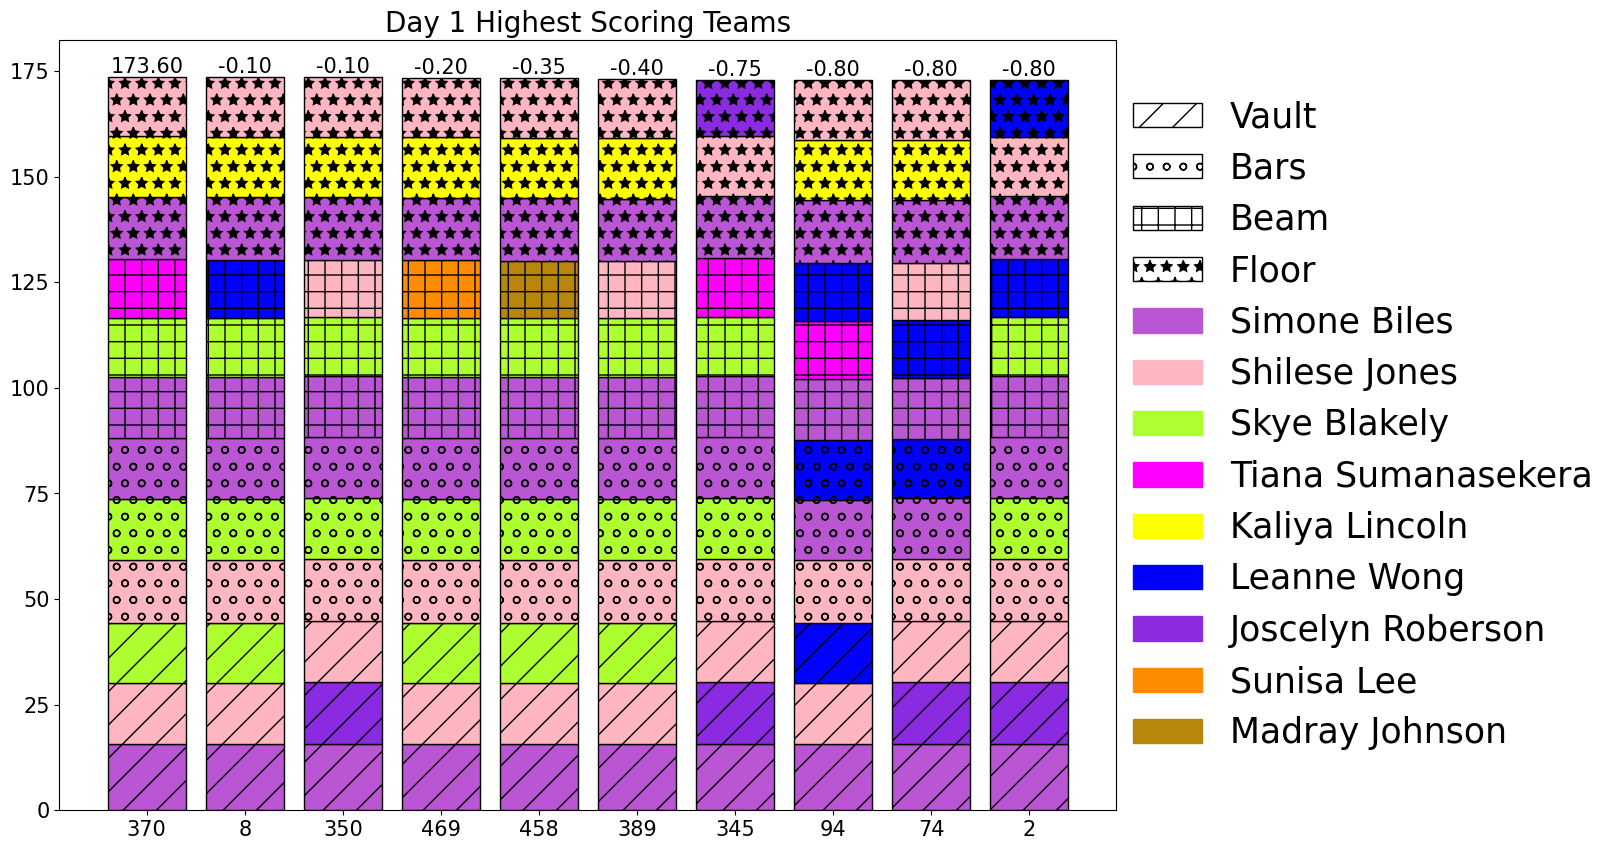

In [16]:
day1_scores, day1_teams, day1_removed_teams = import_counting_scores('Day 1')
day1_top_team_ids = team_scores_bar_chart(day1_scores, 'Day 1')
plt.show()
build_top_team_table(day1_top_team_ids, day1_removed_teams, day1_teams, 'Day 1', -0.03)

### Day 2: Top Scoring Teams

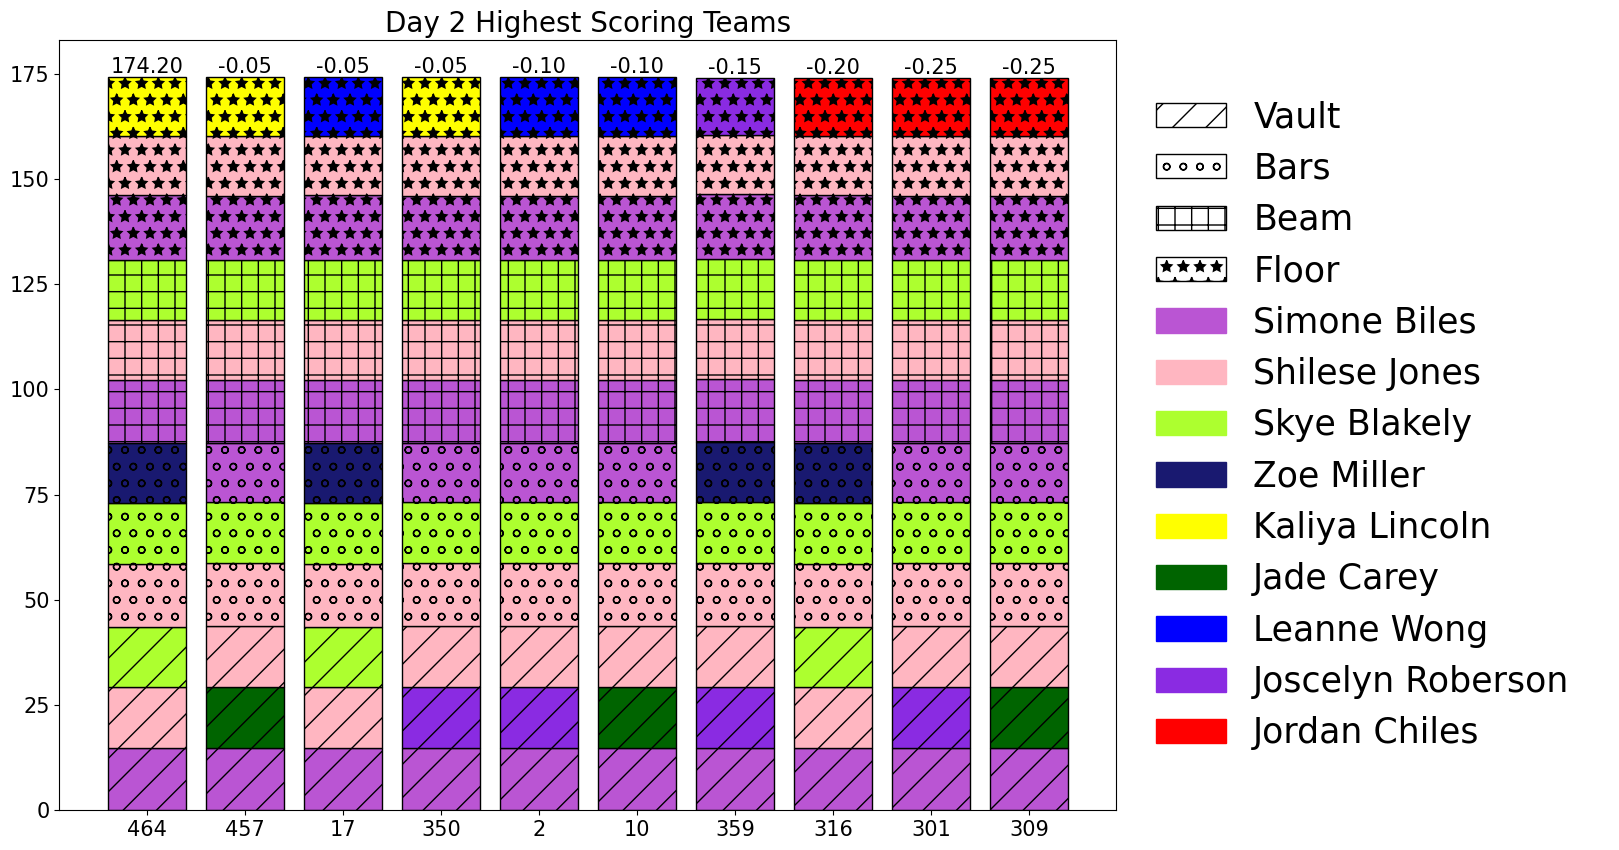

In [17]:
day2_scores, day2_teams, day2_removed_teams = import_counting_scores('Day 2')
day2_top_team_ids = team_scores_bar_chart(day2_scores, 'Day 2')
plt.show()
build_top_team_table(day2_top_team_ids, day2_removed_teams, day2_teams, 'Day 2')

### Average Top Scoring Teams

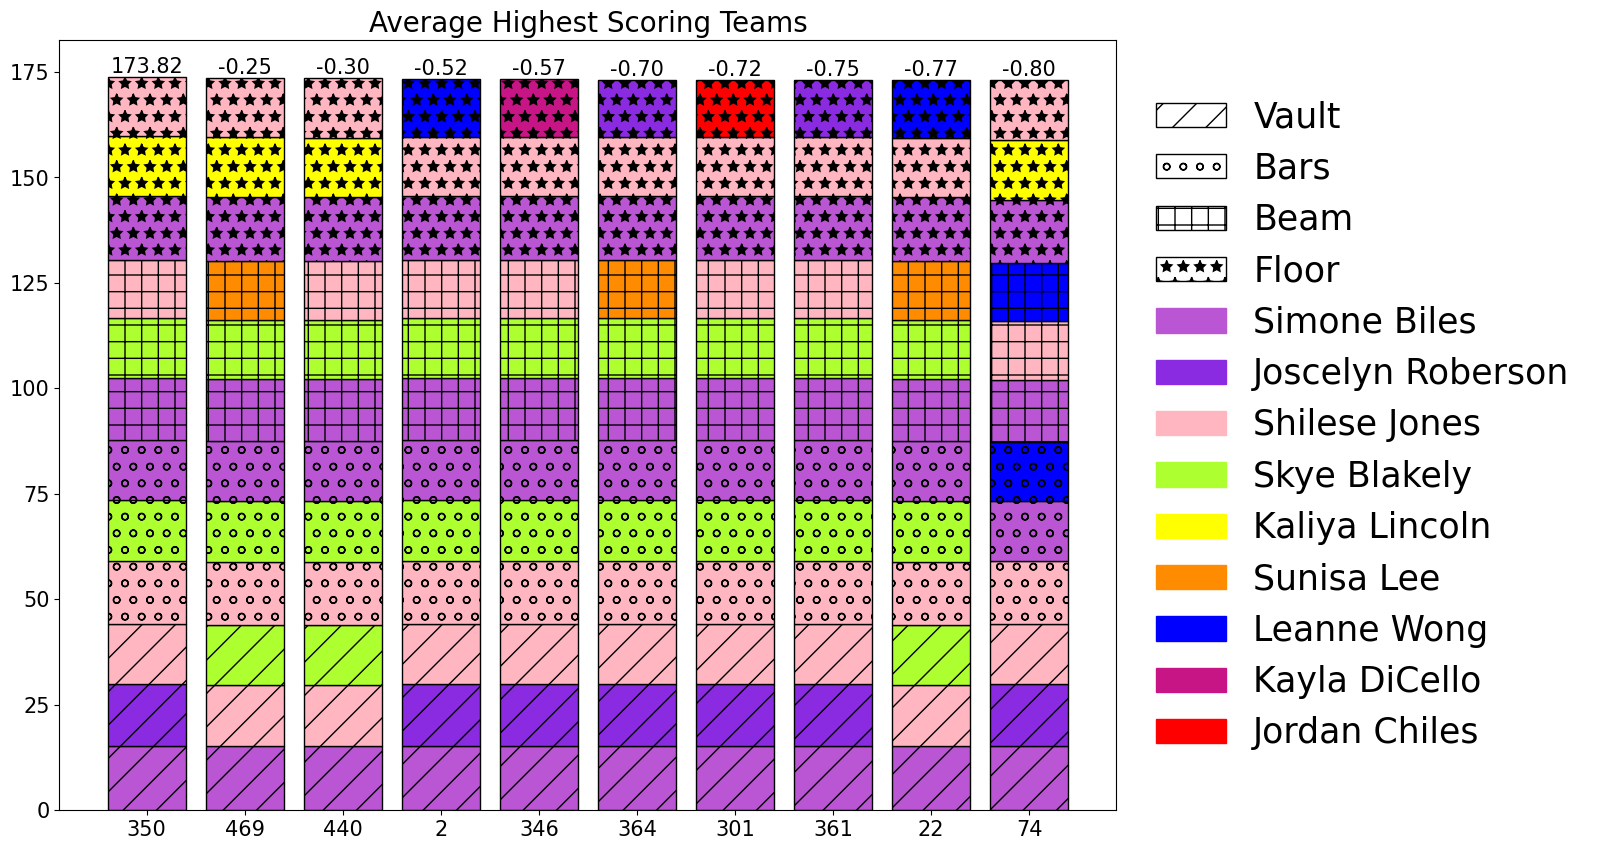

In [19]:
avg_scores, avg_teams, avg_removed_teams = import_counting_scores('Average')
avg_top_team_ids = team_scores_bar_chart(avg_scores, 'Average')
plt.show()
build_top_team_table(avg_top_team_ids, avg_removed_teams, avg_teams, 'Average', -0.12)